In [1]:
# Import the required modules
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Load the Credit Card Data into a Pandas DataFrame

In [2]:
# Read in the CSV file as a pandas Dataframe
ccinfo_df = pd.read_csv("Resources/cc_info_default.csv")

# Review the first five rows of the DataFrame
display(ccinfo_df.head())
# Review the last five rows of the DataFrame
display(ccinfo_df.tail())

,limit_bal,education,marriage,age,bill_amt,pay_amt,default
0,20000,secondary,yes,24,7704,689,1
1,120000,secondary,no,26,17077,5000,1
2,90000,secondary,no,34,101653,11018,0
3,50000,secondary,yes,37,231334,8388,0
4,50000,secondary,yes,57,109339,59049,0


,limit_bal,education,marriage,age,bill_amt,pay_amt,default
4994,20000,secondary,yes,36,110994,7293,0
4995,180000,other,yes,34,35240,22066,0
4996,200000,secondary,yes,45,691806,21443,1
4997,310000,post-grad,yes,44,1548067,72000,0
4998,160000,primary,no,40,4440,3725,0


In [3]:
# Review the info of the DataFrame
ccinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   limit_bal  4999 non-null   int64 
 1   education  4999 non-null   object
 2   marriage   4999 non-null   object
 3   age        4999 non-null   int64 
 4   bill_amt   4999 non-null   int64 
 5   pay_amt    4999 non-null   int64 
 6   default    4999 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


## Data Preprocessing
---
###  Transform "education" column with get_dummies

In [4]:
# Verify the categories of the "education" column
ccinfo_df["education"].value_counts()

education
secondary    2267
primary      1862
post-grad     822
other          48
Name: count, dtype: int64

In [5]:
# Transform the education column using get_dummies
education_encode = pd.get_dummies(ccinfo_df["education"])

# Display the transformed data
education_encode.tail()

,other,post-grad,primary,secondary
4994,False,False,False,True
4995,True,False,False,False
4996,False,False,False,True
4997,False,True,False,False
4998,False,False,True,False


In [6]:
# Concatenate the df_shopping_transformed and the card_dummies DataFrames
ccinfo_df = pd.concat([ccinfo_df, education_encode], axis=1)

# Drop the original education column
ccinfo_df = ccinfo_df.drop(columns=["education"])

# Display the DataFrame
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,20000,yes,24,7704,689,1,False,False,False,True
1,120000,no,26,17077,5000,1,False,False,False,True
2,90000,no,34,101653,11018,0,False,False,False,True
3,50000,yes,37,231334,8388,0,False,False,False,True
4,50000,yes,57,109339,59049,0,False,False,False,True


### Transform "marriage" column with encoding function

In [7]:
# Encoding the marriage column using a custom function
def encode_marriage(marriage):
    """
    This function encodes marital status by setting yes as 1 and no as 0.
    """
    if marriage == "yes":
        return 1
    else:
        return 0

# Call the encode_marriage function on the marriage column
ccinfo_df["marriage"] = ccinfo_df["marriage"].apply(encode_marriage)

# Review the DataFrame 
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,20000,1,24,7704,689,1,False,False,False,True
1,120000,0,26,17077,5000,1,False,False,False,True
2,90000,0,34,101653,11018,0,False,False,False,True
3,50000,1,37,231334,8388,0,False,False,False,True
4,50000,1,57,109339,59049,0,False,False,False,True


## Data Scaling
---

### Apply the Standard Scaler to "limit_bal", "bill_amt", "pay_amt"

In [8]:
# Scaling the numeric columns
ccinfo_data_scaled = StandardScaler().fit_transform(ccinfo_df[["limit_bal", "bill_amt", "pay_amt"]])

# Review the scaled data
ccinfo_data_scaled

array([[-1.1173411 , -0.66070266, -0.5427793 ],
       [-0.3499424 , -0.63637003, -0.46399421],
       [-0.58016201, -0.41680786, -0.35401308],
       ...,
       [ 0.26397655,  1.1152494 , -0.16349243],
       [ 1.10811512,  3.33813208,  0.76045505],
       [-0.04298292, -0.66917611, -0.4872953 ]])

In [9]:
# Create a DataFrame of the scaled data
ccinfo_data_scaled = pd.DataFrame(ccinfo_data_scaled, columns=["limit_bal", "bill_amt", "pay_amt"])

# Replace the original data with the columns of information from the scaled Data
ccinfo_df["limit_bal"] = ccinfo_data_scaled["limit_bal"]
ccinfo_df["bill_amt"] = ccinfo_data_scaled["bill_amt"]
ccinfo_df["pay_amt"] = ccinfo_data_scaled["pay_amt"]

# Review the DataFrame
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,-1.117341,1,24,-0.660703,-0.542779,1,False,False,False,True
1,-0.349942,0,26,-0.636370,-0.463994,1,False,False,False,True
2,-0.580162,0,34,-0.416808,-0.354013,0,False,False,False,True
3,-0.887121,1,37,-0.080152,-0.402077,0,False,False,False,True
4,-0.887121,1,57,-0.396855,0.523771,0,False,False,False,True


### Use the elbow method to find the best `k`.

In [10]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [11]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(ccinfo_df)
    inertia.append(k_model.inertia_)
    

In [12]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,449413.376075
1,2,152036.470987
2,3,84344.359798
3,4,59876.367234
4,5,45643.230589


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

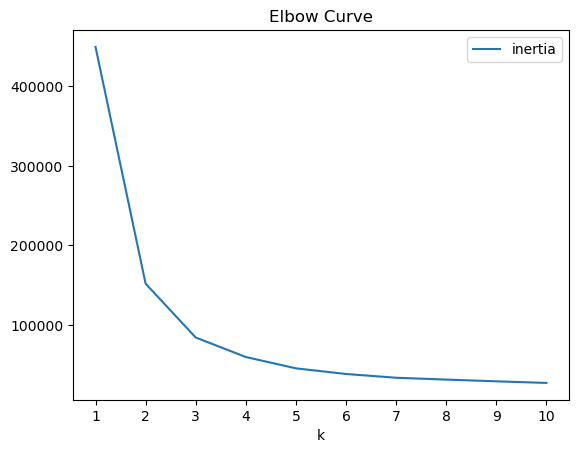

In [13]:
# Plot the elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

##  Apply the KMeans Algorithm
---
### Use Kmeans to cluster data

In [14]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=3)

# Fit the model
model.fit(ccinfo_df)

# Make predictions
k_3 = model.predict(ccinfo_df)

# Create a copy of the preprocessed data
ccinfo_predictions_df = ccinfo_df.copy()

# Add a class column with the labels
ccinfo_predictions_df['customer_segments'] = k_3

<Axes: xlabel='limit_bal', ylabel='age'>

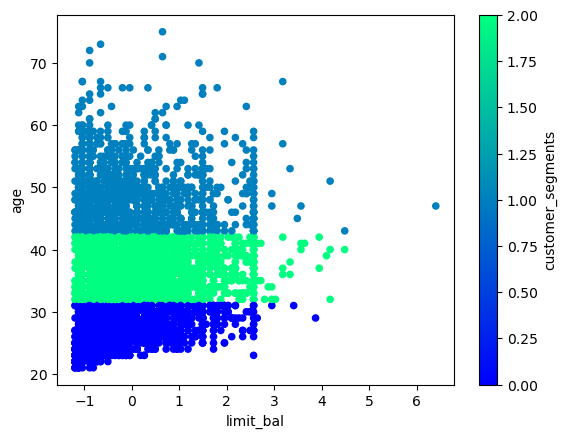

In [15]:
# Plot the clusters
ccinfo_predictions_df.plot.scatter(
    x="limit_bal",
    y="age",
    c="customer_segments",
    colormap="winter")